# 1. Import packages & Loading Data

### 1) Import packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'

### 2) Loading Data

In [2]:
submission=pd.read_csv('submission.csv')
submission.head()

,id,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,0,202004,강원,건강보조식품 소매업,0
1,1,202004,강원,골프장 운영업,0
2,2,202004,강원,과실 및 채소 소매업,0
3,3,202004,강원,관광 민예품 및 선물용품 소매업,0
4,4,202004,강원,그외 기타 분류안된 오락관련 서비스업,0


In [49]:
data=pd.read_csv('201901-202003 (1).csv')

In [50]:
data.columns = ['연월','카드이용_시도','카드이용_시군구','업종명','고객거주_시도','고객거주_시군구','연령대','성별','가구생애주기','이용고객수','이용금액','이용건수']

In [51]:
data.head()

,연월,카드이용_시도,카드이용_시군구,업종명,고객거주_시도,고객거주_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


## 2. 전처리

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 10 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   연월       int64 
 1   카드이용_시도  object
 2   업종명      object
 3   고객거주_시도  object
 4   연령대      int32 
 5   성별       int64 
 6   가구생애주기   int64 
 7   이용고객수    int64 
 8   이용금액     int64 
 9   이용건수     int64 
dtypes: int32(1), int64(6), object(3)
memory usage: 1.7+ GB


변수명

- REG_YYMM :년월
- CARD_SIDO_NM : 카드이용지역_시도 (가맹점 주소 기준)
- CARD_CCG_NM : 카드이용지역_시군구 (가맹점 주소 기준)
- STD_CLSS_NM : 업종명
- HOM_SIDO_NM : 거주지역_시도 (고객 집주소 기준)
- HOM_CCG_NM : 거주지역_시군구 (고객 집주소 기준)
- AGE: 연령대
- SEX_CTGO_CD : 성별 (1: 남성, 2: 여성)
- FLC : 가구생애주기 (1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가구, 5: 노년가구)
- CSTMR_CNT : 이용고객수 (명)
- AMT : 이용금액 (원) - 종속변수
- CNT : 이용건수 (건)

# 2. Data Cleansing

### 1) 결측치

In [52]:
data.isnull().sum()

연월               0
카드이용_시도          0
카드이용_시군구     87213
업종명              0
고객거주_시도          0
고객거주_시군구    147787
연령대              0
성별               0
가구생애주기           0
이용고객수            0
이용금액             0
이용건수             0
dtype: int64

CARD_CCG_NM,HOM_CCG_NM 열은 각각 카드 이용지역과 거주지역의 시,군,구를 나타내는 컬럼이다. \
우리가 필요한건 시,도 데이터이므로 삭제해준다.

In [53]:
del data['카드이용_시군구']
del data['고객거주_시군구']
data.head()

,연월,카드이용_시도,업종명,고객거주_시도,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,201901,강원,건강보조식품 소매업,강원,20s,1,1,4,311200,4
1,201901,강원,건강보조식품 소매업,강원,30s,1,2,7,1374500,8
2,201901,강원,건강보조식품 소매업,강원,30s,2,2,6,818700,6
3,201901,강원,건강보조식품 소매업,강원,40s,1,3,4,1717000,5
4,201901,강원,건강보조식품 소매업,강원,40s,1,4,3,1047300,3


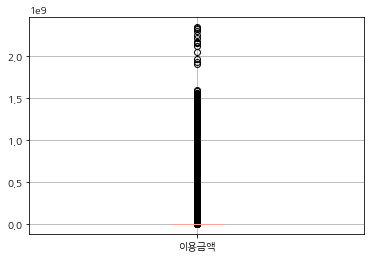

In [54]:
plt.figure()
boxplot=data.boxplot(column=['이용금액'])
plt.show()

### 2) 이상치

In [ ]:
sns.violinplot(data=data.AMT)
plt.show() 

In [ ]:
print('max:',max(data.AMT))
print('min:',min(data.AMT))

In [ ]:
sns.distplot(data['AMT'])

In [ ]:
log_AMT = np.log(data['AMT'])
sns.distplot(log_AMT)

In [55]:
data_atm = data[data['이용금액'] < 10000]
data_atm

,연월,카드이용_시도,업종명,고객거주_시도,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
540,201901,강원,그외 기타 종합 소매업,강원,50s,1,4,3,9000,3
1509,201901,강원,기타음식료품위주종합소매업,광주,20s,1,1,3,7200,3
1546,201901,강원,기타음식료품위주종합소매업,서울,20s,1,1,3,6300,4
1560,201901,강원,기타음식료품위주종합소매업,서울,20s,1,1,3,6900,6
1621,201901,강원,비알콜 음료점업,강원,40s,2,4,3,7800,3
...,...,...,...,...,...,...,...,...,...,...
24696141,202003,충북,체인화 편의점,충북,30s,1,2,3,5900,3
24696913,202003,충북,한식 음식점업,경북,40s,1,4,3,7800,3
24696922,202003,충북,한식 음식점업,경북,20s,2,1,3,4900,3
24697004,202003,충북,한식 음식점업,대구,40s,1,2,3,9300,3


In [56]:
print(len(data))
print(len(data_atm))

24697792
89776


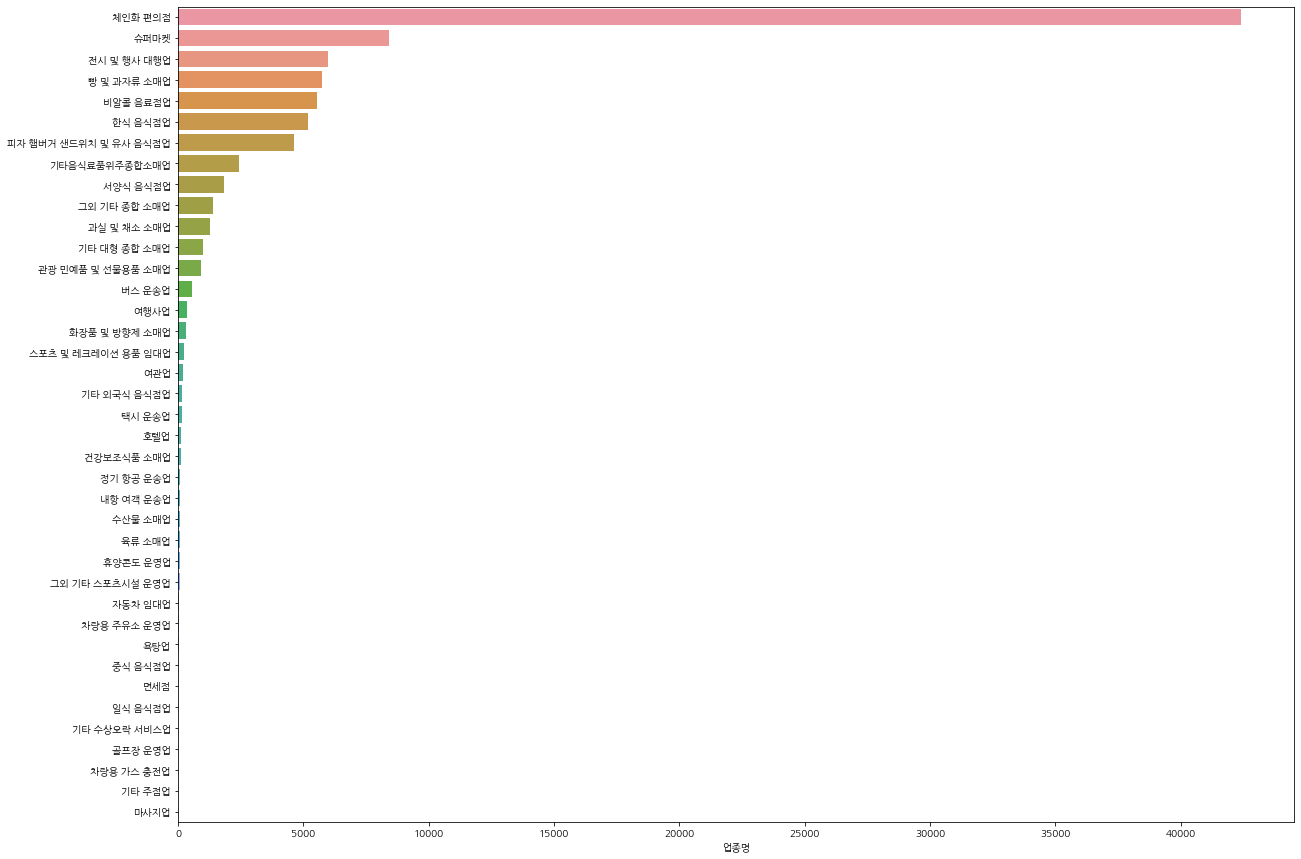

In [57]:
import seaborn as sns 
fig = plt.figure(figsize = (20, 15))
sns.barplot(y = data_atm['업종명'].value_counts().index, x = data_atm['업종명'].value_counts())

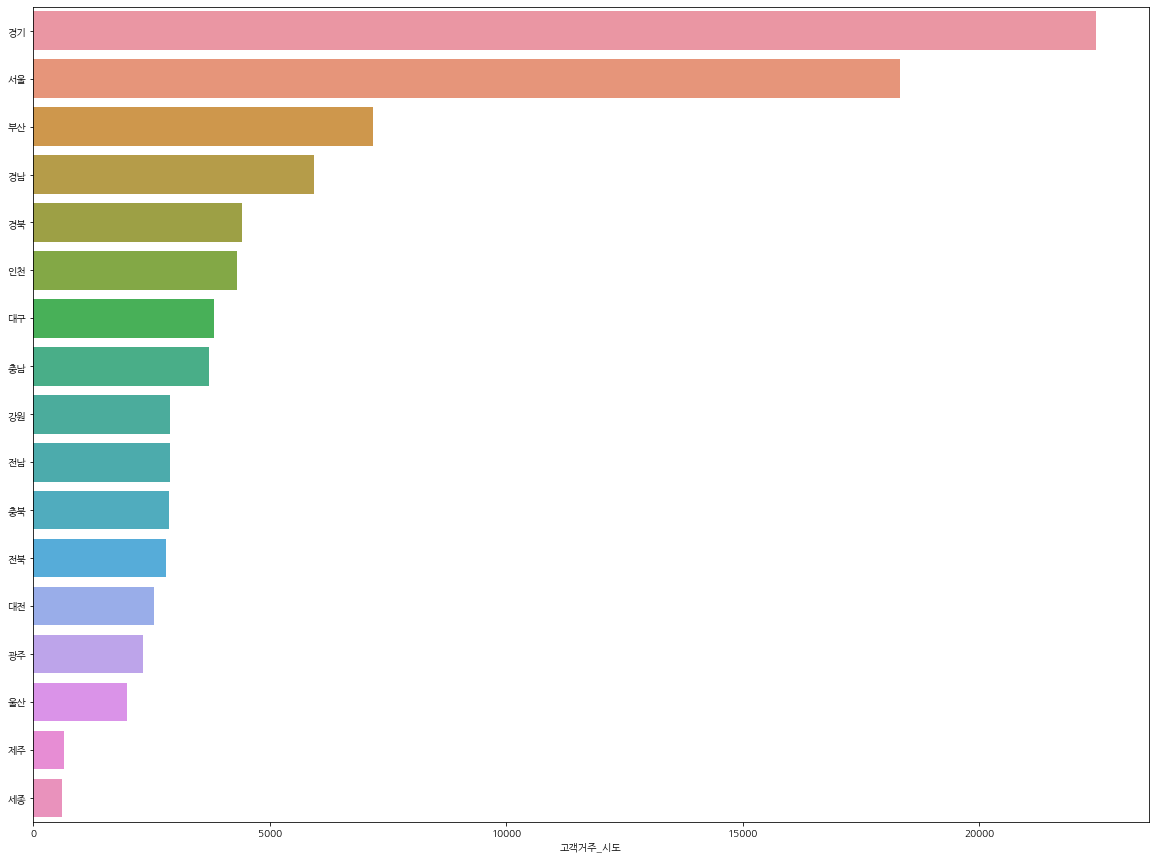

In [59]:
fig = plt.figure(figsize = (20, 15))
sns.barplot(y = data_atm['고객거주_시도'].value_counts().index, x = data_atm['고객거주_시도'].value_counts())

In [62]:
# 20대 소비 패턴
data_age = data[data['연령대']=='20s']
      
#data_age_health = data_age[data_age['STD_CLSS_NM']=='건강보조식품소매업']
data_age

,연월,카드이용_시도,업종명,고객거주_시도,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,201901,강원,건강보조식품 소매업,강원,20s,1,1,4,311200,4
31,201901,강원,과실 및 채소 소매업,강원,20s,1,1,25,650000,29
32,201901,강원,과실 및 채소 소매업,강원,20s,2,1,20,905000,21
54,201901,강원,과실 및 채소 소매업,강원,20s,1,1,4,205000,4
79,201901,강원,과실 및 채소 소매업,경기,20s,2,1,4,75000,4
...,...,...,...,...,...,...,...,...,...,...
24697766,202003,충북,화장품 및 방향제 소매업,충북,20s,2,1,3,19700,3
24697768,202003,충북,화장품 및 방향제 소매업,충북,20s,1,1,15,458000,20
24697769,202003,충북,화장품 및 방향제 소매업,충북,20s,2,1,67,1420490,83
24697770,202003,충북,화장품 및 방향제 소매업,충북,20s,2,2,18,396340,20


In [63]:
len(data_age)

5091675

In [64]:
data_age_health = data_age[data_age['업종명']=='건강보조식품 소매업']
data_age_health

,연월,카드이용_시도,업종명,고객거주_시도,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,201901,강원,건강보조식품 소매업,강원,20s,1,1,4,311200,4
94857,201901,경기,건강보조식품 소매업,경기,20s,2,1,3,695750,3
132559,201901,경기,건강보조식품 소매업,경기,20s,1,1,6,188000,9
132560,201901,경기,건강보조식품 소매업,경기,20s,2,1,5,154100,5
146258,201901,경기,건강보조식품 소매업,경기,20s,1,1,3,26000,5
...,...,...,...,...,...,...,...,...,...,...
24635002,202003,충남,건강보조식품 소매업,충남,20s,1,1,4,17300,4
24642223,202003,충남,건강보조식품 소매업,충남,20s,2,1,6,320000,6
24642224,202003,충남,건강보조식품 소매업,충남,20s,2,2,14,1852600,18
24692944,202003,충북,건강보조식품 소매업,충북,20s,1,1,4,97000,5


In [65]:
len(data_age_health)

4068

In [66]:
#fig = plt.figure(figsize = (20, 15))
#sns.barplot(y = data_age_health['HOM_SIDO_NM'].value_counts().index, x = data_age_health['AMT'].value_counts())

In [67]:
df = data.groupby('연월')[['이용고객수','이용건수']].sum().reset_index()
#df['REG_YYMM']=df['REG_YYMM'].astype('object')
df.head()

,연월,이용고객수,이용건수
0,201901,98934121,197458766
1,201902,93167173,175758111
2,201903,103677023,209598246
3,201904,103458114,211060076
4,201905,111522559,228416675


# 3. Feature Engineering / Plots


In [68]:
df = data.groupby(['고객거주_시도','업종명'])[['이용고객수','이용금액','이용건수']].sum().reset_index() #시도와 업종별로 나누기
df.head()

,고객거주_시도,업종명,이용고객수,이용금액,이용건수
0,강원,건강보조식품 소매업,16413,1979108831,17854
1,강원,골프장 운영업,70452,9254520967,102068
2,강원,과실 및 채소 소매업,228525,12189257956,327726
3,강원,관광 민예품 및 선물용품 소매업,8998,291712806,11065
4,강원,그외 기타 스포츠시설 운영업,1182,96278620,1651


In [69]:
print('지역명 : ',data['카드이용_시도'].unique())
print('업종명 : ',data['업종명'].unique())
SIDO=data['카드이용_시도'].unique()

지역명 :  ['강원' '경기' '경남' '경북' '광주' '대구' '대전' '부산' '서울' '세종' '울산' '인천' '전남' '전북'
 '제주' '충남' '충북']
업종명 :  ['건강보조식품 소매업' '골프장 운영업' '과실 및 채소 소매업' '관광 민예품 및 선물용품 소매업'
 '그외 기타 스포츠시설 운영업' '그외 기타 종합 소매업' '기타 대형 종합 소매업' '기타 외국식 음식점업' '기타 주점업'
 '기타음식료품위주종합소매업' '마사지업' '비알콜 음료점업' '빵 및 과자류 소매업' '서양식 음식점업' '수산물 소매업'
 '슈퍼마켓' '스포츠 및 레크레이션 용품 임대업' '여관업' '욕탕업' '육류 소매업' '일반유흥 주점업' '일식 음식점업'
 '전시 및 행사 대행업' '중식 음식점업' '차량용 가스 충전업' '차량용 주유소 운영업' '체인화 편의점'
 '피자 햄버거 샌드위치 및 유사 음식점업' '한식 음식점업' '호텔업' '화장품 및 방향제 소매업' '휴양콘도 운영업' '여행사업'
 '자동차 임대업' '면세점' '버스 운송업' '택시 운송업' '기타 수상오락 서비스업' '내항 여객 운송업'
 '그외 기타 분류안된 오락관련 서비스업' '정기 항공 운송업']


In [70]:
def Area_cnt(k): #지역을 나눠서 업종별 이용건수 그래프
    where=df[df['카드이용_시도']==k]
    where=where.sort_values(by='이용건수',ascending=False)
    fig = plt.figure(figsize = (20,10))
    sns.barplot(x =where['이용건수'], y = where['업종명'])
    plt.title(k)
    plt.show()

In [71]:
def Area_amt(k): #지역을 나눠서 업종별 금액 그래프
    where=df[df['카드이용_시도']==k]
    where=where.sort_values(by='이용금액',ascending=False)
    fig = plt.figure(figsize = (20,10))
    sns.barplot(x =where['이용금액'], y = where['업종명'])
    plt.title(k)
    plt.show()

In [72]:
Area_cnt('강원')

KeyError: '카드이용_시도'

In [73]:
Area_amt('강원')

KeyError: '카드이용_시도'

# 4. 상관관계 분석

In [74]:
data.corr()

,연월,성별,가구생애주기,이용고객수,이용금액,이용건수
연월,1.000000,-0.009399,-0.005525,0.001432,0.003167,0.002144
성별,-0.009399,1.000000,-0.023134,0.008258,-0.005424,0.000469
가구생애주기,-0.005525,-0.023134,1.000000,0.006774,0.041099,-0.001011
이용고객수,0.001432,0.008258,0.006774,1.000000,0.866339,0.930356
이용금액,0.003167,-0.005424,0.041099,0.866339,1.000000,0.778102
이용건수,0.002144,0.000469,-0.001011,0.930356,0.778102,1.000000


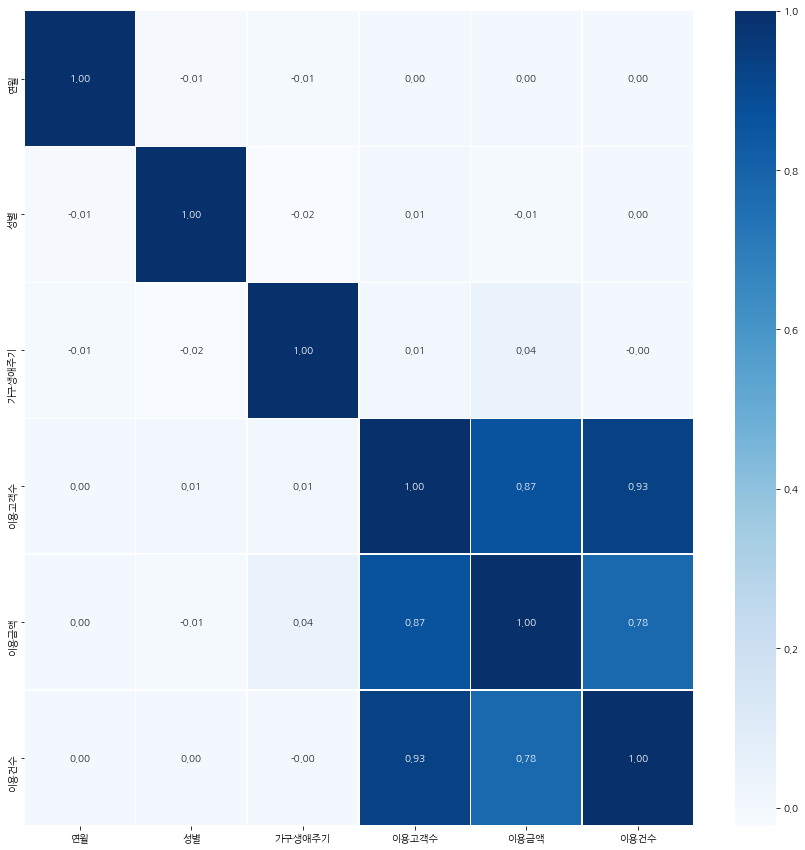

In [75]:
plt.figure(figsize=(15,15))
sns.heatmap(data = data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [77]:
data['연령대'] = data['연령대'].str.rstrip('s').astype('int')
data.head()

,연월,카드이용_시도,업종명,고객거주_시도,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,201901,강원,건강보조식품 소매업,강원,20,1,1,4,311200,4
1,201901,강원,건강보조식품 소매업,강원,30,1,2,7,1374500,8
2,201901,강원,건강보조식품 소매업,강원,30,2,2,6,818700,6
3,201901,강원,건강보조식품 소매업,강원,40,1,3,4,1717000,5
4,201901,강원,건강보조식품 소매업,강원,40,1,4,3,1047300,3


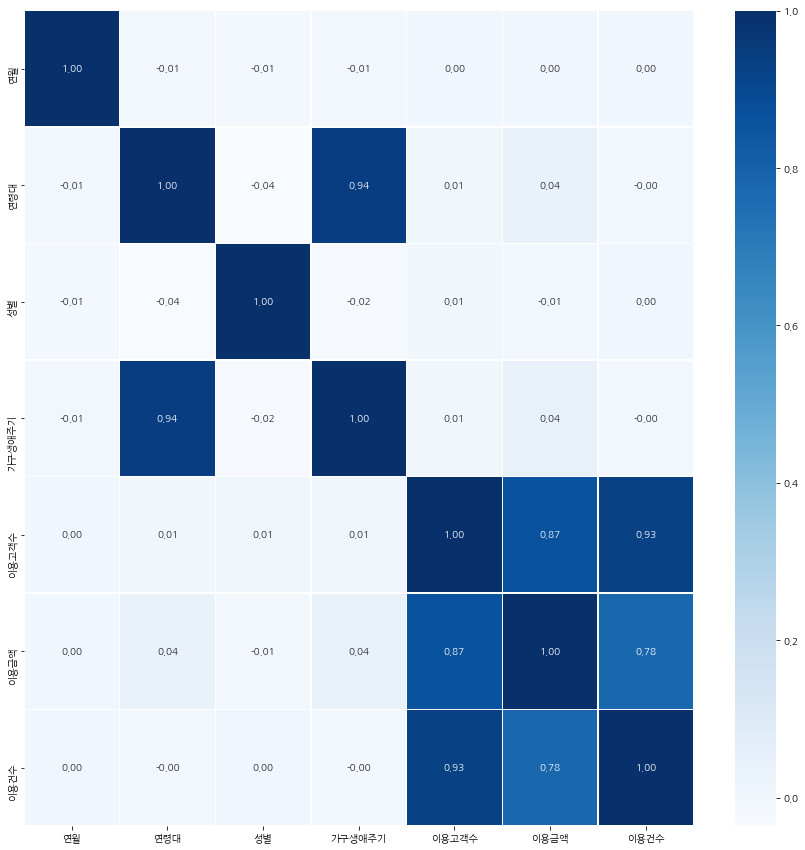

In [78]:
plt.figure(figsize=(15,15))
sns.heatmap(data = data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


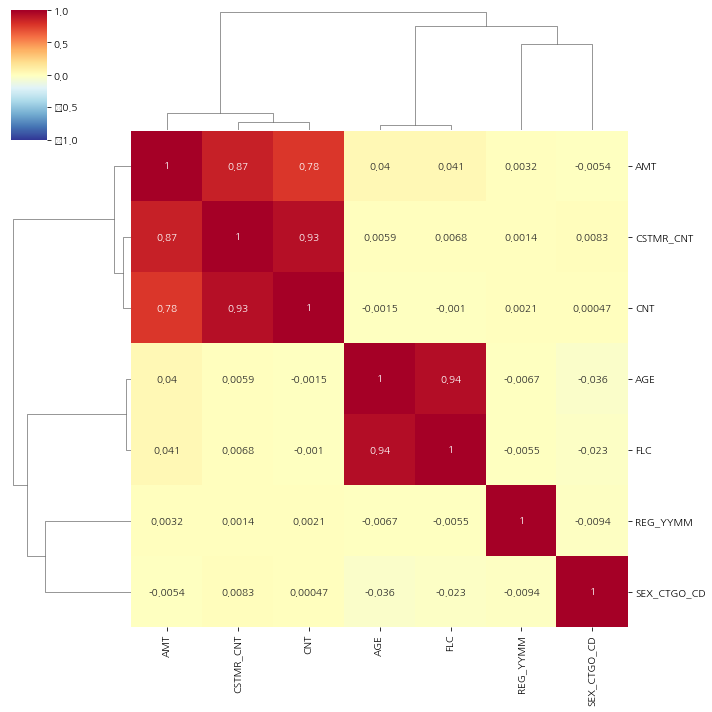

In [42]:
df = data.corr()

sns.clustermap(df, annot = True, cmap = 'RdYlBu_r', vmin=-1, vmax=1)

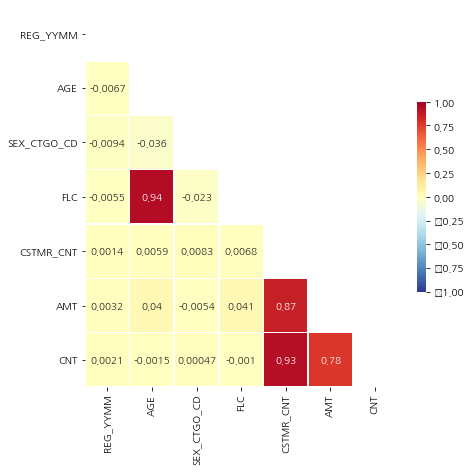

In [44]:
df = data.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

## 카드 이용 지역 확인, 고객 거주 지역 확인

In [88]:
print( data.카드이용_시도.unique() )
df1_card_sido= pd.DataFrame( data.카드이용_시도.value_counts().sort_index(ascending=True)  )
df1_card_sido

print( data.고객거주_시도.unique() )
df1_sido= pd.DataFrame( data.고객거주_시도.value_counts().sort_index(ascending=True)  )
df1_sido

['강원' '경기' '경남' '경북' '광주' '대구' '대전' '부산' '서울' '세종' '울산' '인천' '전남' '전북'
 '제주' '충남' '충북']
['강원' '경기' '서울' '경남' '경북' '대구' '대전' '세종' '인천' '충남' '충북' '광주' '부산' '울산'
 '전남' '전북' '제주']


,고객거주_시도
강원,602004
경기,6614016
경남,1463499
경북,1068082
광주,667626
대구,1077209
대전,586938
부산,1960951
서울,5387540
세종,147787


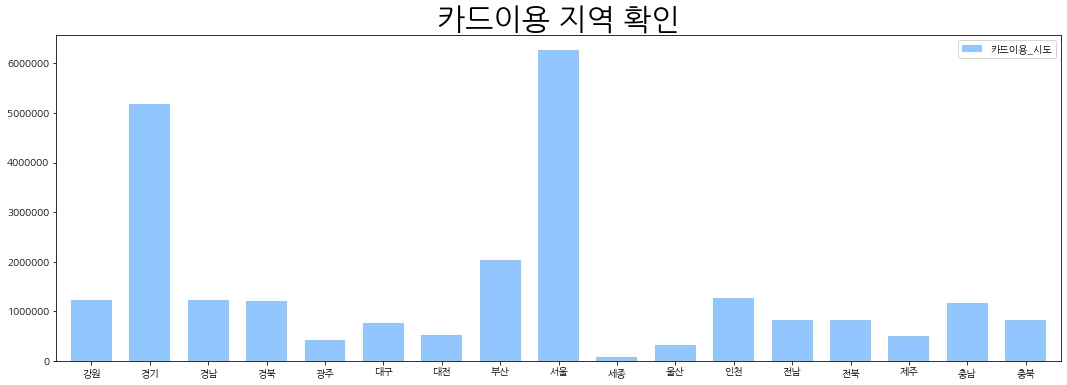

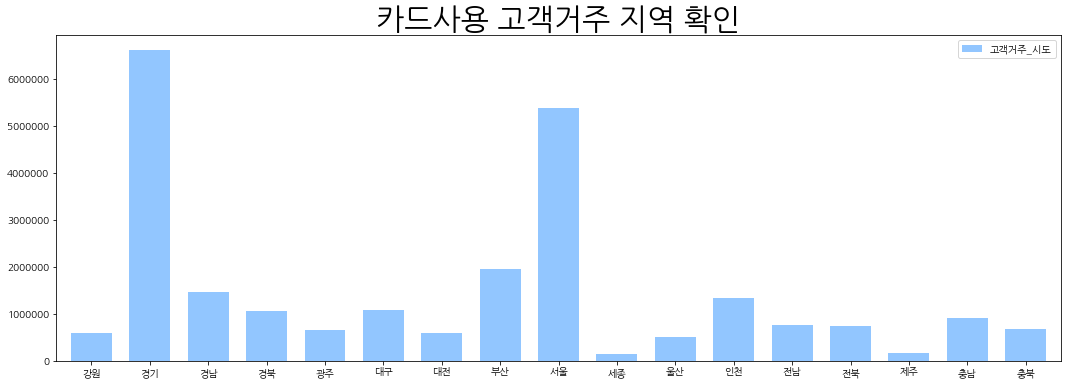

In [89]:
plt.style.use( 'seaborn-pastel' )
df1_card_sido.plot( kind = 'bar', figsize = ( 18, 6 ), width = 0.7 )
plt.xticks( rotation = 'horizontal' ) 
plt.title( '카드이용 지역 확인', size = 30 )
plt.show()

plt.style.use( 'seaborn-pastel' )
df1_sido.plot( kind = 'bar', figsize = ( 18, 6 ), width = 0.7 )
plt.xticks( rotation = 'horizontal' ) 
plt.title( '카드사용 고객거주 지역 확인', size = 30 )
plt.show()

In [79]:
df1_kind = pd.DataFrame(data.업종명.value_counts())
df1_kind

,업종명
한식 음식점업,3697166
체인화 편의점,3210466
슈퍼마켓,1630700
차량용 주유소 운영업,1613476
비알콜 음료점업,1586120
기타 대형 종합 소매업,1495163
서양식 음식점업,1404839
피자 햄버거 샌드위치 및 유사 음식점업,1351478
빵 및 과자류 소매업,989794
중식 음식점업,698803


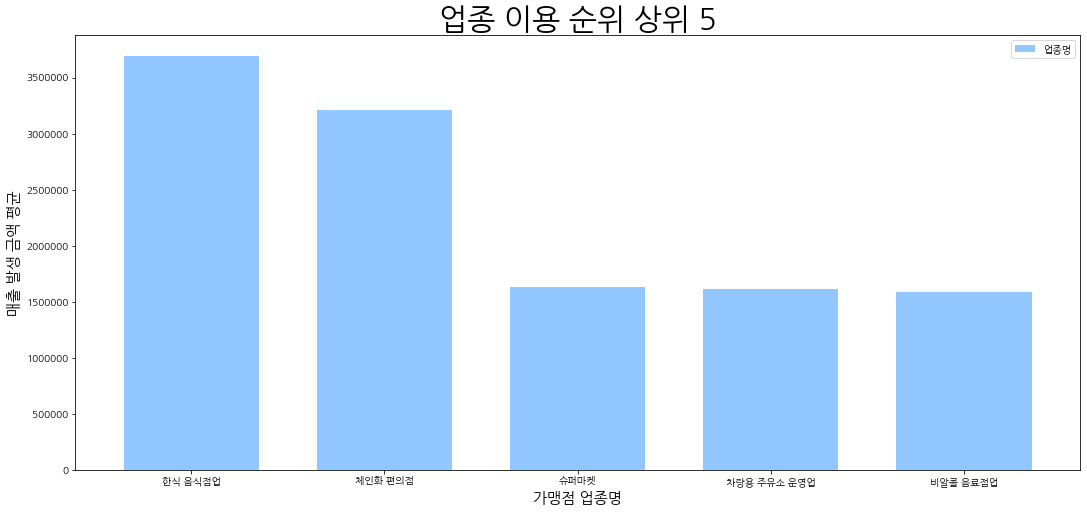

In [80]:
plt.style.use( 'seaborn-pastel' )
df1_kind.head(5).plot( kind = 'bar', figsize = ( 18, 8 ), width = 0.7 )
plt.xticks( rotation = 'horizontal' )
plt.xlabel( '가맹점 업종명', size = 15 )
plt.ylabel( '매출 발생 금액 평균', size = 15 )
plt.title( '업종 이용 순위 상위 5', size = 30 )
plt.show()

In [82]:
print( data.연령대.unique())
df1_age = pd.DataFrame(data.연령대.value_counts().sort_index(ascending=True) )
df1_age

[20 30 40 50 60 70 10]


,연령대
10,314674
20,5091675
30,5550519
40,5802447
50,4455687
60,2606168
70,876622


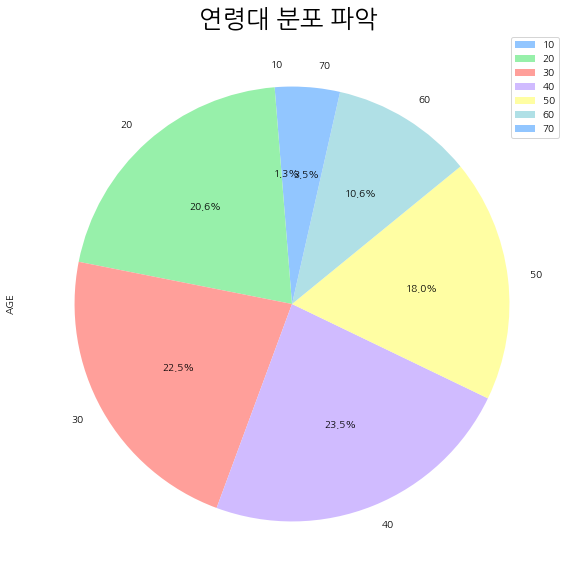

In [37]:
plt.style.use( 'seaborn-pastel')
df1_age.plot( kind = 'pie', figsize = (10,10), autopct = '%1.1f%%', startangle = 90, subplots=True)
plt.title( '연령대 분포 파악 ', size = 25 )
plt.show()

In [83]:
print( data.성별.unique())
df1_sex = data.성별.value_counts()
df1_sex = pd.DataFrame(data=df1_sex)
df1_sex 

[1 2]


,성별
1,14506378
2,10191414


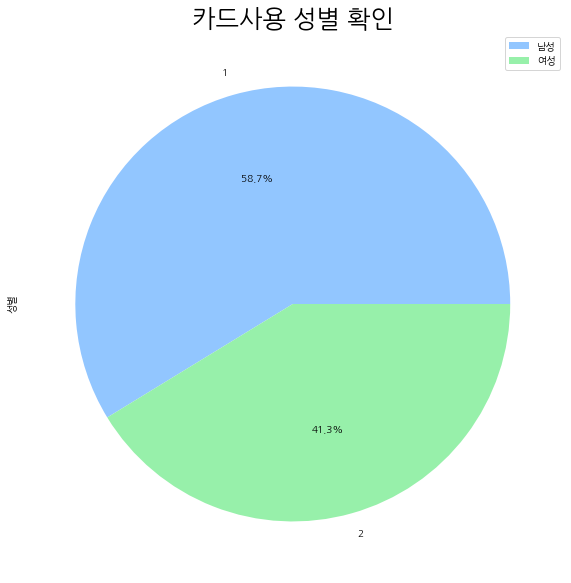

In [84]:
plt.style.use( 'seaborn-pastel')
df1_sex.plot( kind = 'pie', figsize = ( 10,10), autopct = '%1.1f%%' ,subplots=True   )
plt.title( '카드사용 성별 확인', size = 25 )
plt.legend(labels=('남성','여성'))

In [85]:
print( data.가구생애주기.unique()) 
df1_cycle = pd.DataFrame(  data.가구생애주기.value_counts().sort_index(ascending=True) )
df1_cycle

[1 2 3 4 5]


,가구생애주기
1,5526140
2,6188801
3,4054741
4,5445320
5,3482790


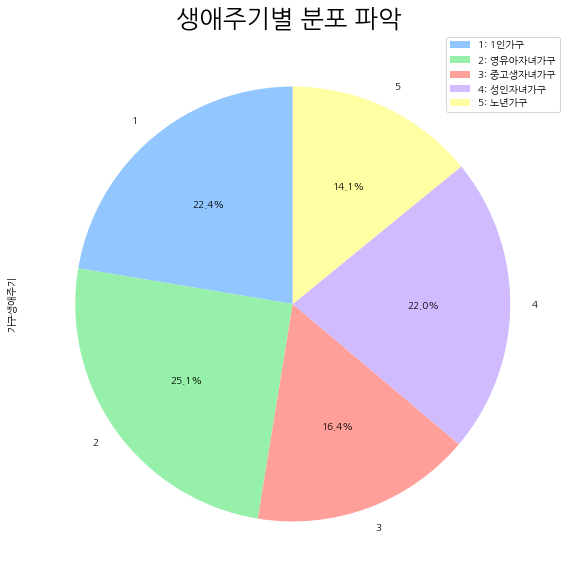

In [86]:
plt.style.use( 'seaborn-pastel')
df1_cycle.plot( kind = 'pie', figsize = (10,10), autopct = '%1.1f%%', startangle = 90, subplots=True)
plt.title( '생애주기별 분포 파악 ', size = 25 )
plt.legend(labels=('1: 1인가구', '2: 영유아자녀가구', '3: 중고생자녀가구', '4: 성인자녀가구', '5: 노년가구'))
plt.show()